In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

**Set up data**

Create two points (pt and pt2) that will be used to find neighboring healpix pixels. Retrieve the indices of those pixels and the coordinates of their centers.

In [3]:
ORDER = 4
NSIDE = 2**ORDER
NPIX = hp.nside2npix(NSIDE)
NRES = hp.nside2resol(NSIDE)
print(f"NPIX = {NPIX} and resolution = {NRES}")

pt = (np.pi / 16, np.pi * 1 / 8)
ipix = hp.ang2pix(NSIDE, pt[0], pt[1], nest=True)
ipix_center = hp.pix2ang(NSIDE, ipix, nest=True)
print(f"Point ({pt[0]}, {pt[1]}) is in pixel {ipix} centered on ({ipix_center[0]}, {ipix_center[1]})")

pt2 = (ipix_center[0] + NRES, ipix_center[1] - NRES)
ipix2 = hp.ang2pix(NSIDE, pt2[0], pt2[1], nest=True)
ipix_center2 = hp.pix2ang(NSIDE, ipix2, nest=True)
print(f"Point ({pt2[0]}, {pt2[1]}) is in pixel {ipix2} centered on ({ipix_center2[0]}, {ipix_center2[1]})")

NPIX = 3072 and resolution = 0.06395791924665553
Point (0.19634954084936207, 0.39269908169872414) is in pixel 251 centered on (0.1532430094961162, 0.2617993877991494)
Point (0.21720092874277172, 0.19784146855249388) is in pixel 250 centered on (0.20448019896853498, 0.19634954084936207)


**Visualize Pixels**

Plot the two pixels on the full sky in order to visualize their shapes and locations.

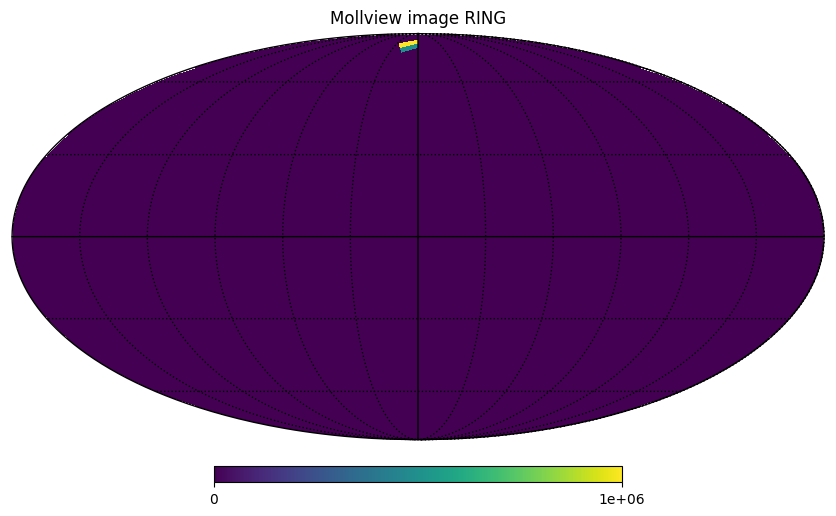

In [4]:
m = np.arange(NPIX)
m[ipix] = 1000000
m[ipix2] = 500000
hp.mollview(m, title="Mollview image RING", nest=True)
hp.graticule()

**Visualize Boundaries**

Compute points along the boundaries of both pixels and plot them in 3-dimensional space.

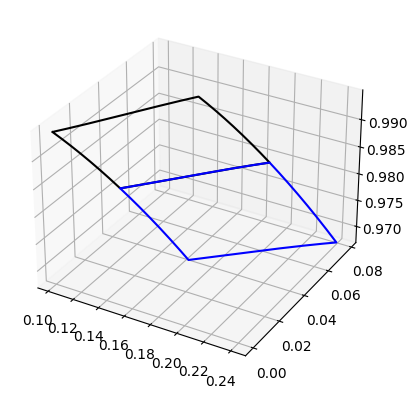

In [5]:
bnd_pts1 = hp.boundaries(NSIDE, ipix, step=100, nest=True)
bnd_pts2 = hp.boundaries(NSIDE, ipix2, step=100, nest=True)

ax = plt.figure().add_subplot(projection="3d")
ax.plot(bnd_pts1[0], bnd_pts1[1], bnd_pts1[2], color="black")
ax.plot(bnd_pts2[0], bnd_pts2[1], bnd_pts2[2], color="blue")

**Visualize Boundaries Part 2**

Use the 3-d boundary points to compute the angular points of the boundaries. Plot those in 2-dimensional space along with the original two points used to pick the pixels.

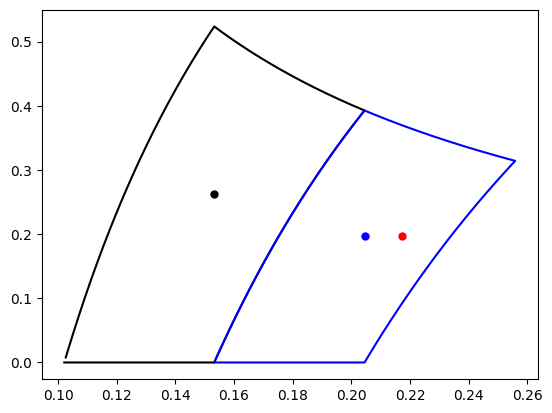

In [6]:
ang_pts1 = hp.vec2dir(bnd_pts1)
ang_pts2 = hp.vec2dir(bnd_pts2)

ax2 = plt.figure().add_subplot()
ax2.plot(ang_pts1[0], ang_pts1[1], "black")
ax2.plot(ipix_center[0], ipix_center[1], color="black", marker=".", markersize=10)

ax2.plot(ang_pts2[0], ang_pts2[1], "blue")
ax2.plot(ipix_center2[0], ipix_center2[1], color="blue", marker=".", markersize=10)

ax2.plot(pt2[0], pt2[1], color="red", marker=".", markersize=10)

**Distances to pixel's centers**
Even though it looks like every point in a pixel should be closer to the pixel's center than to another pixels's center, this is not the case. We can test this by sampling a bunch of points on the border between two adjacent pixels. We color the points closer to the first pixel's center green and points closer to the second pixel's center red.

As shown there are points within pixel 1 that are actually closer to the center of pixel 2 (and the other way around too).

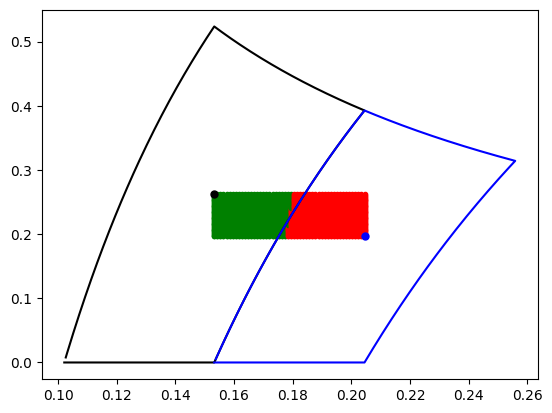

In [7]:
ax3 = plt.figure().add_subplot()

minx = min(ipix_center[0], ipix_center2[0])
miny = min(ipix_center[1], ipix_center2[1])
maxx = max(ipix_center[0], ipix_center2[0])
maxy = max(ipix_center[1], ipix_center2[1])

for x in np.linspace(minx, maxx, 50):
    for y in np.linspace(miny, maxy, 50):
        d1 = hp.rotator.angdist(np.array([x, y]), ipix_center)
        d2 = hp.rotator.angdist(np.array([x, y]), ipix_center2)
        if d2 > d1:
            ax3.plot(x, y, color="green", marker=".")
        else:
            ax3.plot(x, y, color="red", marker=".")
        
ax3.plot(ang_pts1[0], ang_pts1[1], "black")
ax3.plot(ipix_center[0], ipix_center[1], color="black", marker=".", markersize=10)

ax3.plot(ang_pts2[0], ang_pts2[1], "blue")
ax3.plot(ipix_center2[0], ipix_center2[1], color="blue", marker=".", markersize=10)